# Redes Neuronales: El perceptrón

El perceptrón es la unidad fundamental de una red neuronal. A pesar de lo que una red neuronal en su conjunto puede hacer, el funcionamiento individual de sus elementos es muy simple. Es por esto, que las redes neuronales también se consideran sistemas complejos.

## Generemos algunos datos

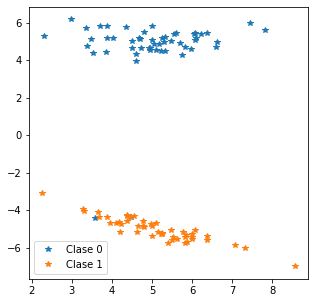

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
np.random.seed(3)

def dibujar_clases(cls, ax=None, figsize=(5,5)):
    if ax is None:
        _, axis = plt.subplots(figsize=figsize)
    else:
        axis = ax

    for i, c in enumerate(cls):
        axis.plot(c[:, 0], c[:, 1], '*', label=f'Clase {i}')
    plt.legend()
    if ax is None:
        plt.show()


n_clases = 2
data, clss = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, class_sep=5)

clases = [data[clss==i] for i in range(n_clases)]

dibujar_clases(clases)

## Tracemos una línea entre los datos

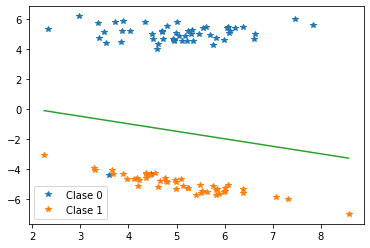

In [ ]:
## Trazando una línea divisoria

def generar_linea(a, b, inter=(np.min(data[:, 0]),np.max(data[:, 0]))):
    x = np.linspace(*inter)
    y = a*x + b # Forma ordenada-pendiente
    return x, y

params = -0.5, 1 # a , b

_, ax = plt.subplots()
dibujar_clases(clases, ax)
ax.plot(*generar_linea(*params))
plt.show()

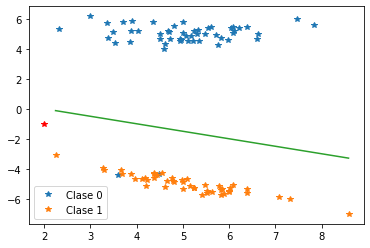

El valor de y para la línea en x=2 es de 0.0


In [ ]:
#coloquemos un nuevo punto y veamos en qué clase cae

pt = 2, -1 
_, ax = plt.subplots()
dibujar_clases(clases, ax)
ax.plot(*generar_linea(*params))
ax.plot(*pt, 'r*')
plt.show()

print(f'El valor de y para la línea en x={pt[0]} es de {params[0]*pt[0]+params[1]}')

## Intentando clasificar

In [ ]:
# Cambiando la expresión de la recta a la forma general y -ax -b = 0
def clasificar(a,b, x, y):
    return y - a*x - b

clasificar(params[0],params[1], pt[0], pt[1])

-1.0

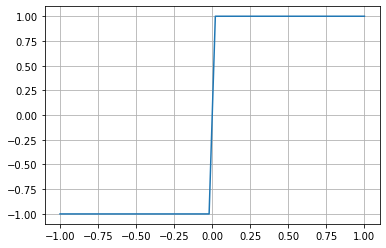

In [ ]:
# Función paso
def paso(y):
    return y / np.abs(y)

plt.plot()
x_paso = np.linspace(-1,1)
plt.plot(x_paso, paso(x_paso))
plt.grid()
plt.show()

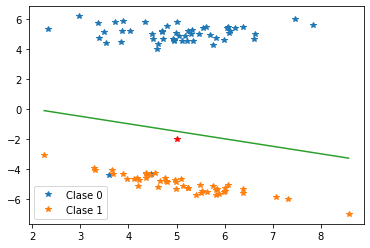

El punto (5, -2) pertenece a la clase -1.0


In [ ]:
def clasificar(a,b, x, y):
    return paso(y - (a*x + b))

params = -0.5, 1 # a , b
pt = 5, -2  # x , y
_, ax = plt.subplots()
dibujar_clases(clases, ax)
ax.plot(*generar_linea(*params))
ax.plot(*pt, 'r*')
plt.show()

clase = clasificar(params[0],params[1], pt[0], pt[1])
print(f'El punto {pt} pertenece a la clase {clase}')

### Vectorizando

In [ ]:
#Vectorizando las operaciones
# -b + -ax  + y = 0
# w0 + w1*x + w2*y = 0
# w0*x0 + w1*x1 + w2*x2 = 0

def generar_linea_vec(W, inter=(np.min(data[:, 0]), np.max(data[:, 0]))):
    ws = -(W/W[-1])[:2]
    x = np.linspace(*inter)
    X = np.array([np.ones_like(x), x])
    return x, np.dot(ws.T, X)[0]

def visualizar_datos(X, W):
    _, ax = plt.subplots()
    dibujar_clases(clases, ax)
    ax.plot(*generar_linea_vec(W))
    ax.plot(X[1], X[2], 'r*')
    plt.show()

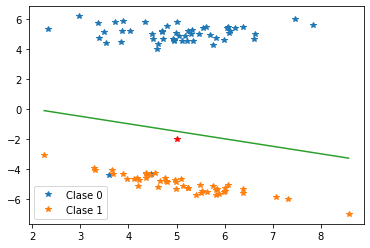

array([[-0.5]])

In [ ]:
params = -0.5, 1 # a , b
pt = 5, -2  # x , y

W = np.array([[-params[1]], #w0
              [-params[0]], #w1
              [1]])#w2
X = np.array([[1], #x0 
              [pt[0]], #x1 - x
              [pt[1]]])#x2 - y

visualizar_datos(X, W)
np.dot(W.T, X)

In [ ]:
def clasificar_vec(X, W):
    return paso(np.dot(W.T, X))[0,0]

clasificar_vec(X, W)

-1.0

Funciones de activación

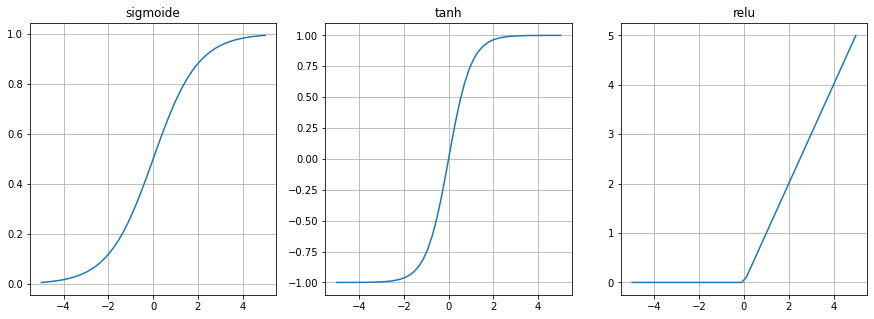

In [ ]:
def sigmoide(z):
    return 1 / ( 1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

z = np.linspace(-5,5)

_, axs = plt.subplots(1,3, figsize=(15,5))

for f, title, ax in zip([ sigmoide,   tanh,   relu],
                        ['sigmoide', 'tanh', 'relu'],
                        axs):
    ax.plot(z, f(z))
    ax.grid()
    ax.set_title(title)


plt.show()

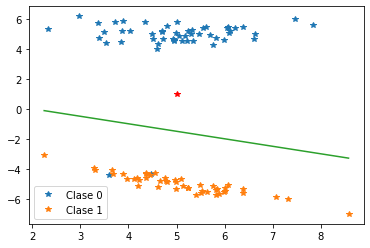

El punto (5, 1) percenece a la clase [[0.92414182]]


In [ ]:
def clasificar_vec(X, W, activacion=sigmoide):
    return activacion(np.dot(W.T, X))

params = -0.5, 1 # a , b
pt = 5, 1  # x , y

W = np.array([[-params[1]], #w0
              [-params[0]], #w1
              [1]])#w2
X = np.array([[1], #x0 
              [pt[0]], #x1 - x
              [pt[1]]])#x2 - y

def visualizar_datos(W=None, X=None, devolver_ax = False):
    _, ax = plt.subplots()
    dibujar_clases(clases, ax)
    if W is not None: ax.plot(*generar_linea_vec(W))
    if X is not None: ax.plot(X[1], X[2], 'r*')
    if devolver_ax:
        return ax
    else:
        plt.show()

visualizar_datos(W, X)
print(f'El punto {pt} percenece a la clase {clasificar_vec(X,W , sigmoide)}')

<img src='https://929687.smushcdn.com/2407837/wp-content/uploads/2021/04/perceptron-1.png?size=630x459&lossy=1&strip=1&webp=1'>



# Armando redes de neuronas

In [ ]:
from sklearn.neural_network import MLPClassifier as NN

nn = NN((2,), activation='relu', max_iter=1000)
nn.fit(data, clss)
print(f'Número de neuronas de entrada: {nn.n_features_in_}')
print(f'Número de capas totales: {nn.n_layers_}')
print(f'Número de neuronas de salida: {nn.n_outputs_}')

Número de neuronas de entrada: 2
Número de capas totales: 3
Número de neuronas de salida: 1


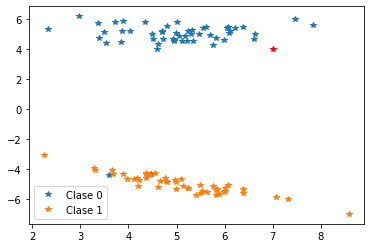

El punto (5, 1) percenece a la clase [0]


In [ ]:
X = np.array([[7],  # x
              [4]])# y

clase = nn.predict(X.T)

ax = visualizar_datos(devolver_ax=True)
ax.plot(*X.T[0], 'r*')
plt.show()
print(f'El punto {pt} percenece a la clase {clase}')

[0 1 2]
(100, 2)


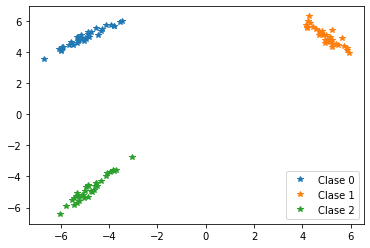

Número de neuronas de entrada: 2
Número de capas totales: 5
Número de neuronas de salida: 3


In [ ]:
n_clases = 3
data, clss = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, class_sep=5, n_classes=n_clases)
clases = [data[clss==i] for i in range(n_clases)]

print(np.unique(clss))

print(data.shape)

_, ax = plt.subplots()
dibujar_clases(clases, ax)
plt.show()

nn = NN((50,50,10), activation='relu', max_iter=1000)
nn.fit(data, clss)
print(f'Número de neuronas de entrada: {nn.n_features_in_}')
print(f'Número de capas totales: {nn.n_layers_}')
print(f'Número de neuronas de salida: {nn.n_outputs_}')

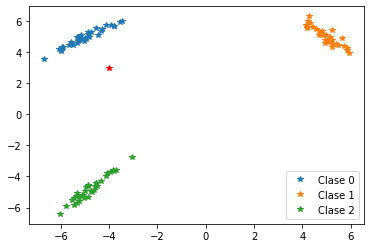

El punto (5, 1) percenece a la clase [0]


In [ ]:
X = np.array([[-4],  # x
              [3]])# y

clase = nn.predict(X.T)

ax = visualizar_datos(devolver_ax=True)
ax.plot(*X.T[0], 'r*')
plt.show()
print(f'El punto {pt} percenece a la clase {clase}')

# Visualización

Tensorflow (una de las librerías más importantes para aprendizaje profundo) tiene una maravillosa [herramienta](https://playground.tensorflow.org).